In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns



# Load the MNIST dataset


In [ ]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(np.uint8)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train a RandomForest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)


In [ ]:

# Predict on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


In [ ]:

# Get feature importance
importances = clf.feature_importances_

# Reshape the feature importance to match the 28x28 image
importances_image = importances.reshape(28, 28)

# Plot feature importance
plt.figure(figsize=(8, 8))
sns.heatmap(importances_image, cmap='viridis', cbar=True, square=True)
plt.title('Feature Importance for MNIST with RandomForest')
plt.show()


Accuracy: 0.88


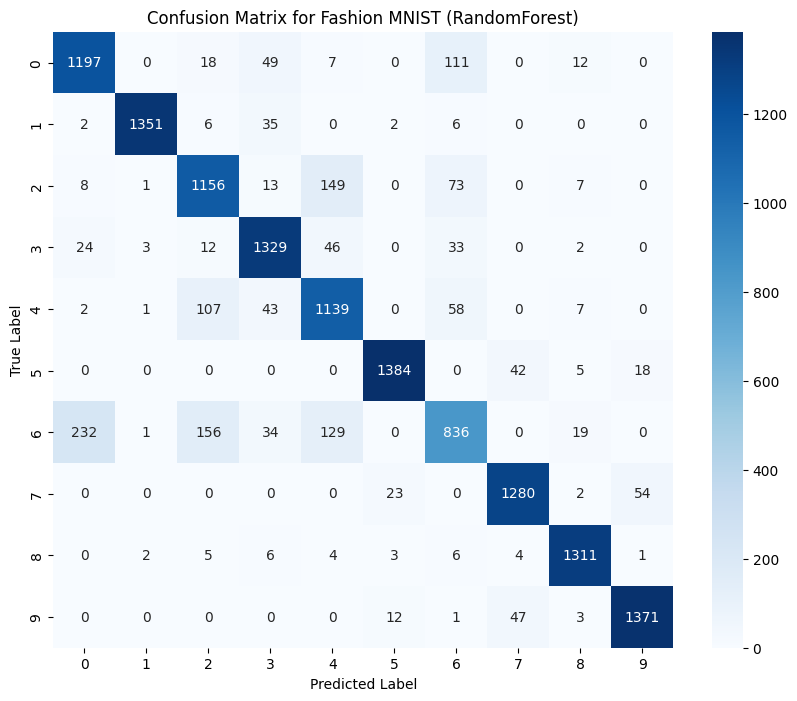

In [10]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Fashion MNIST (RandomForest)')
plt.show()
